# Check River Flows

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import nc_tools

%matplotlib inline

In [2]:
def find_points(flow):
    for i in range(390, 501):
        for j in range(280, 398):
            if flow[0,i,j] != 0:
                print (i,j, lat[i,j], lon[i,j], flow[0,i,j] * e1t[i,j] * e2t[i,j]/
                      (e1t[500, 395] * e2t[500, 395]))

In [12]:
def check_points(flow, tmask):
    for i in range(898):
        for j in range(398):
            if tmask[0, i, j] !=1:
                if flow[0, i, j] != 0:
                    print ('Land River', i ,j)

In [6]:
grid = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
lat = grid.variables['nav_lat'][:,:]
lon = grid.variables['nav_lon'][:,:]
depth = grid.variables['Bathymetry'][:]
grid.close()
mesh = nc.Dataset('../../../NEMO-forcing/grid/mesh_mask201702.nc')
e1t = mesh.variables['e1t'][0,:]
e2t = mesh.variables['e2t'][0,:]
tmask = mesh.variables['tmask'][0,:]
mesh.close()

In [4]:
river1 = nc.Dataset('/results/forcing/rivers/R201702DFraCElse_y2014m09d12.nc')
river2 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/rivers/rivers_month_201702.nc')


In [5]:
print ('Sep 12, 2014')
print ('Daily')
find_points(river1.variables['rorunoff'][:,:,:])
print ('Monthly')
find_points(river2.variables['rorunoff'][:,:,:])
print ('Difference')
find_points(river2.variables['rorunoff'][:,:,:] - river1.variables['rorunoff'][:,:,:])


Sep 12, 2014
Daily
457 343 49.3154449463 -123.139831543 0.0816339215203
458 343 49.3193588257 -123.143196106 0.0816194329737
459 343 49.3232688904 -123.146560669 0.0816049362553
500 394 49.5787086487 -123.02016449 11.9428140937
Monthly
457 343 49.3154449463 -123.139831543 0.0454712606178
458 343 49.3193588257 -123.143196106 0.0454631902904
459 343 49.3232688904 -123.146560669 0.0454551154111
500 394 49.5787086487 -123.02016449 8.10383673878
Difference
457 343 49.3154449463 -123.139831543 -0.0361626609025
458 343 49.3193588257 -123.143196106 -0.0361562426833
459 343 49.3232688904 -123.146560669 -0.0361498208442
500 394 49.5787086487 -123.02016449 -3.8389773549


In [14]:
check_points(river2.variables['rorunoff'][:,:,:], tmask)

Land River 806 126


In [13]:
check_points(river2.variables['rorunoff'][:,:,:], tmask)

Land River 806 126


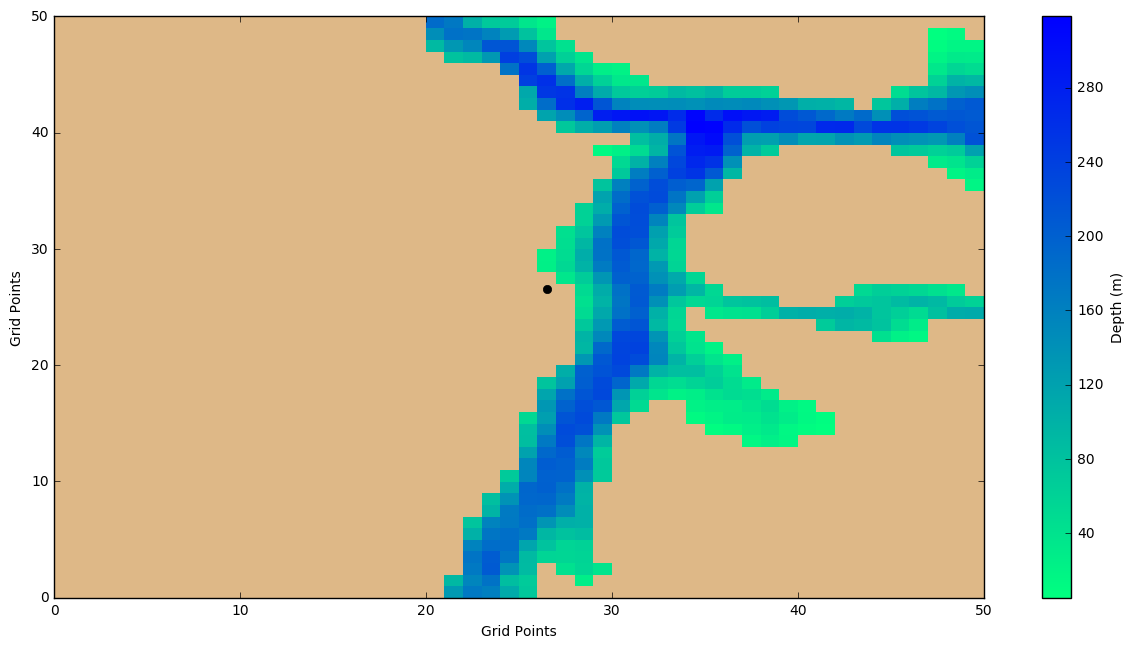

In [16]:
fig, ax = plt.subplots(1,1,figsize=(15,7.5))
imin = 780; imax = 830; jmin = 100; jmax = 150
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(depth[imin:imax,jmin:jmax], cmap=cmap)
ax.set_xlabel('Grid Points')
ax.set_ylabel('Grid Points')
cbar=fig.colorbar(mesh)
cbar.set_label('Depth (m)')
ax.plot(806+0.5-imin, 126+0.5-jmin,'ko');